In [3]:
from sage.calculus.desolvers import desolve_system_rk4
import numpy as np

hbar,m_e,e = 1,1,1

In [4]:
def coup(n,m):
    s1 = sin((n + m) * pi/2)/(n + m)**2
    s2 = sin((n - m) * pi/2)/(n - m)**2
    return s1 - s2
    
def x_nm(n,m,L):
    return 2 * L * coup(n,m) / pi**2

def E_n(n,L):
    return pi**2 * n**2 / (2 * L**2)

def omega_nm(n,m,L):
    return E_n(n,L) - E_n(m,L)

# ******************************************** #

def alpha(q,E0,x_nm):
    return -q * E0 * x_nm

def R_Omega(det,alpha):
    return sqrt(det**2 + alpha**2 / hbar**2)

In [5]:
# RWA transition probabilities

def prob_1(t,det,alpha_nm):
    p1_1 = cos(R_Omega(det,alpha_nm)*t/2)**2
    p1_2 = sin(R_Omega(det,alpha_nm)*t/2)**2 * det**2 / R_Omega(det,alpha_nm)**2
    
    return p1_1 + p1_2

def prob_2(t,det,alpha_nm):
    
    return sin(R_Omega(det,alpha_nm)*t/2)**2 * alpha_nm**2 / R_Omega(det,alpha_nm)**2

In [6]:
# noRWA coeff diff eq

def c1_dot(t,c2,omega_0,omega_E,alpha):
    return c2 * exp(-1j * omega_0 * t) * cos(omega_E * t) * alpha / 1j

def c2_dot(t,c1,omega_0,omega_E,alpha):
    return c1 * exp(1j * omega_0 * t) * cos(omega_E * t) * alpha / 1j

def int_system(omega_nm,omega,T_lim):
    c1,c2,t,omega_0,omega_E = var('c1 c2 t omega_0 omega_E')
    
    P = desolve_system_rk4([c1_dot(t,c2,omega_0,omega_E,alpha),c2_dot(t,c1,omega_0,omega,alpha)],\
                       [c1,c2,omega_0,omega_E],ivar=t,ics=[0,1,0,omega_nm,omega],end_points=[0,T_lim],step=0.05)
    
    return P

In [7]:
# for ground and 1st exited state

q,E0,L = -1,0.1,10

x_21 = x_nm(1,2,L)

w_21 = omega_nm(2,1,L)

alpha_21 = alpha(q,E0,x_21)

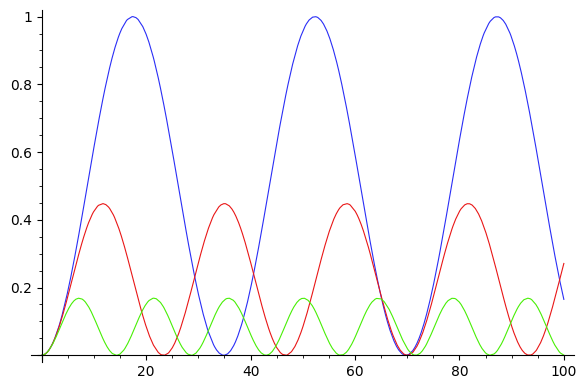

In [8]:
t = var('t') #t scale: 2.41888e-17 s

t_lim = 100

p_d0 = plot((prob_2(t,0,alpha_21)),(t,0,t_lim),color='#2a2ef6',thickness=0.8)
p_d04 = plot((prob_2(t,0.2,alpha_21)),(t,0,t_lim),color='#e91717',thickness=0.8)
p_d08 = plot((prob_2(t,0.4,alpha_21)),(t,0,t_lim),color='#48ef06',thickness=0.8)

show(p_d0+p_d04+p_d08)

In [9]:
P = int_system(w_21,w_21,100)

TypeError: unsupported operand type(s) for *: 'sage.symbolic.expression.Expression' and 'function'

In [15]:
float(x_nm(5,4,1))

-0.2001406096638771